# 🎓 Gated DeltaNet: From Zero to Hero

Welcome! This notebook will teach you the core concepts of Gated DeltaNet through **hands-on coding tasks**.

We'll start extremely simple and build up gradually. Each task has:
- 📝 **Explanation** - What you're learning
- ✏️ **Your Task** - Code you need to write
- ✅ **Test** - Automated check to see if you got it right

Let's begin! 🚀

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


---
## Part 1: Understanding Forget Gates

### What is a Forget Gate?

Imagine you have a memory (like remembering what you had for breakfast). A **forget gate** decides:
- How much of the old memory to keep (remember)
- How much to forget (discard)

It's just a number between 0 and 1:
- `gate = 0.0` → Forget everything! 🗑️
- `gate = 0.5` → Keep half, forget half 🤔
- `gate = 1.0` → Remember everything! 🧠

---

### 📝 Task 1.1: Your First Forget Gate

**Concept**: Apply a forget gate to a single number (your memory).

**Formula**: `new_memory = forget_gate * old_memory`

**Your Task**: Complete the function below!

In [3]:
def apply_forget_gate(old_memory, forget_gate):
    """
    Apply a forget gate to a memory value.
    
    Args:
        old_memory: The previous memory value (a number)
        forget_gate: How much to remember (0.0 to 1.0)
    
    Returns:
        new_memory: The updated memory after applying the gate
    """
    # TODO: Calculate new_memory by multiplying old_memory with forget_gate
    new_memory = forget_gate * old_memory  # <- Replace this line with your code!
    
    return new_memory

# ✅ Test your code
result = apply_forget_gate(old_memory=10.0, forget_gate=0.5)
print(f"Old memory: 10.0, Forget gate: 0.5, New memory: {result}")

assert result == 5.0, "❌ Not quite! Check your multiplication."
print("✅ Task 1.1 complete! You've mastered the basic forget gate!")

Old memory: 10.0, Forget gate: 0.5, New memory: 5.0
✅ Task 1.1 complete! You've mastered the basic forget gate!


### 🎯 Experiment: See the Forget Gate in Action

Run this cell to visualize how different gate values affect memory over time!

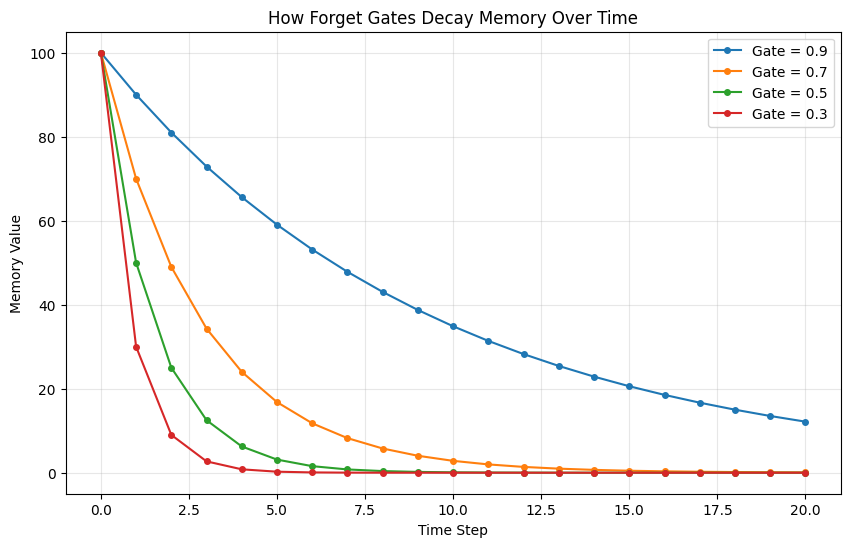

💡 Notice: Smaller gates forget faster!


In [4]:
# Starting memory
initial_memory = 100.0

# Try different forget gates
gates = [0.9, 0.7, 0.5, 0.3]  # Different amounts of forgetting
time_steps = 20

plt.figure(figsize=(10, 6))

for gate in gates:
    memory_over_time = [initial_memory]
    
    for t in range(time_steps):
        new_memory = apply_forget_gate(memory_over_time[-1], gate)
        memory_over_time.append(new_memory)
    
    plt.plot(memory_over_time, label=f'Gate = {gate}', marker='o', markersize=4)

plt.xlabel('Time Step')
plt.ylabel('Memory Value')
plt.title('How Forget Gates Decay Memory Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("💡 Notice: Smaller gates forget faster!")

---
### 📝 Task 1.2: Forget Gates with Vectors

**Concept**: Now instead of one memory value, you have a **vector** of memories (like remembering multiple things at once).

**Example**: You might remember:
```
memory = [temperature, humidity, wind_speed]
       = [25.0, 60.0, 15.0]
```

You can apply a forget gate to **each element** of the vector!

**Your Task**: Apply a forget gate to a vector of memories.

In [5]:
def apply_forget_gate_vector(old_memory_vector, forget_gate):
    """
    Apply a forget gate to a vector of memories.
    
    Args:
        old_memory_vector: A torch tensor of shape [d] with d memory values
        forget_gate: How much to remember (0.0 to 1.0)
    
    Returns:
        new_memory_vector: The updated memory vector
    """
    # TODO: Multiply the entire vector by the forget_gate
    # Hint: In PyTorch, you can multiply a tensor by a scalar!
    new_memory_vector = old_memory_vector * forget_gate  # <- Replace this!
    
    return new_memory_vector

# ✅ Test your code
old_mem = torch.tensor([10.0, 20.0, 30.0])
result = apply_forget_gate_vector(old_mem, forget_gate=0.5)
print(f"Old memory: {old_mem}")
print(f"Forget gate: 0.5")
print(f"New memory: {result}")

expected = torch.tensor([5.0, 10.0, 15.0])
assert torch.allclose(result, expected), "❌ Not quite! Remember to multiply each element."
print("\n✅ Task 1.2 complete! You can now forget vector memories!")

Old memory: tensor([10., 20., 30.])
Forget gate: 0.5
New memory: tensor([ 5., 10., 15.])

✅ Task 1.2 complete! You can now forget vector memories!


---
### 📝 Task 1.3: Different Gates for Different Memories

**Concept**: What if you want to forget some things more than others?

You can use a **gate vector** where each element controls how much to forget that specific memory!

**Example**:
```
memory = [25.0, 60.0, 15.0]
gates  = [0.9,  0.5,  0.1]  ← Remember temperature well, forget wind_speed quickly
result = [22.5, 30.0, 1.5]
```

**Your Task**: Apply element-wise forget gates!

In [6]:
def apply_elementwise_forget_gate(old_memory_vector, forget_gate_vector):
    """
    Apply different forget gates to each element of memory.
    
    Args:
        old_memory_vector: torch tensor [d]
        forget_gate_vector: torch tensor [d] with values between 0 and 1
    
    Returns:
        new_memory_vector: Element-wise product of memory and gates
    """
    # TODO: Multiply the two vectors element-wise
    # Hint: In PyTorch, just use the * operator!
    new_memory_vector = old_memory_vector * forget_gate_vector  # <- Your code here
    
    return new_memory_vector

# ✅ Test your code
old_mem = torch.tensor([10.0, 20.0, 30.0])
gates = torch.tensor([0.9, 0.5, 0.1])
result = apply_elementwise_forget_gate(old_mem, gates)

print(f"Old memory: {old_mem}")
print(f"Gates:      {gates}")
print(f"New memory: {result}")

expected = torch.tensor([9.0, 10.0, 3.0])
assert torch.allclose(result, expected), "❌ Check your element-wise multiplication!"
print("\n✅ Task 1.3 complete! You've mastered element-wise gating!")

Old memory: tensor([10., 20., 30.])
Gates:      tensor([0.9000, 0.5000, 0.1000])
New memory: tensor([ 9., 10.,  3.])

✅ Task 1.3 complete! You've mastered element-wise gating!


---
### 📝 Task 1.4: Adding New Memories

**Concept**: So far we've only been *forgetting*. But what about *learning* new things?

The **delta rule** combines:
1. **Forgetting** old memories (multiply by gate)
2. **Adding** new memories

**Formula**: `new_state = forget_gate * old_state + new_input`

Think of it like:
- You partially forget yesterday's weather (multiply by gate)
- You add today's weather (add new input)

**Your Task**: Implement the delta rule!

In [7]:
def delta_rule_update(old_state, new_input, forget_gate):
    """
    Update state using the delta rule: combine forgetting and learning.
    
    Args:
        old_state: Previous state vector [d]
        new_input: New information to add [d]
        forget_gate: How much to remember (0 to 1)
    
    Returns:
        new_state: Updated state
    """
    # TODO: Implement the delta rule formula
    # Step 1: Multiply old_state by forget_gate (forgetting)
    # Step 2: Add new_input (learning)
    new_state = forget_gate * old_state + new_input  # <- Your code here
    
    return new_state

# ✅ Test your code
old_state = torch.tensor([10.0, 20.0])
new_input = torch.tensor([5.0, 3.0])
gate = 0.8

result = delta_rule_update(old_state, new_input, gate)
print(f"Old state:  {old_state}")
print(f"New input:  {new_input}")
print(f"Gate:       {gate}")
print(f"New state:  {result}")

# 0.8 * [10, 20] + [5, 3] = [8, 16] + [5, 3] = [13, 19]
expected = torch.tensor([13.0, 19.0])
assert torch.allclose(result, expected), "❌ Check your formula: gate * old + new"
print("\n✅ Task 1.4 complete! You've implemented the delta rule!")

Old state:  tensor([10., 20.])
New input:  tensor([5., 3.])
Gate:       0.8
New state:  tensor([13., 19.])

✅ Task 1.4 complete! You've implemented the delta rule!


### 🎯 Experiment: Watch the Delta Rule in Action

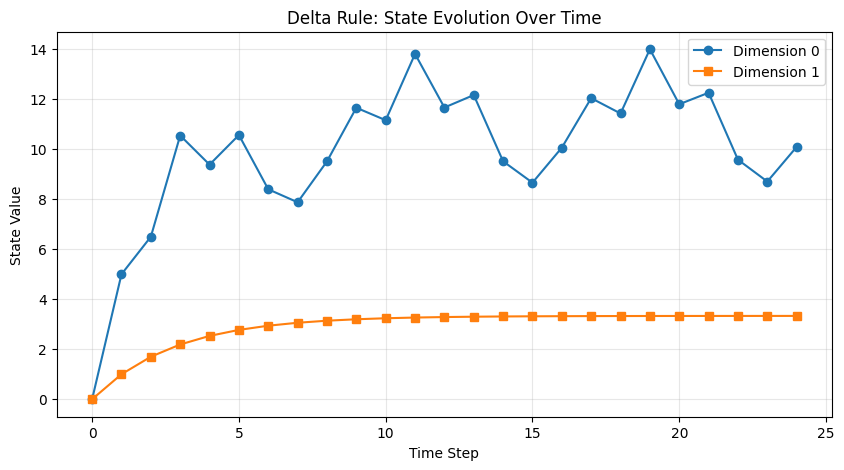

💡 The state adapts to new inputs while gradually forgetting old ones!


In [14]:
# Simulate updating state over time with delta rule
state = torch.zeros(2)  # Start with empty memory
gate = 0.7  # Forget 30% each step

states_over_time = [state.clone()]

# Sequence of inputs (e.g., daily temperatures)
inputs = [
    torch.tensor([5.0, 1.0]),
    torch.tensor([3.0, 1.0]),
    torch.tensor([6.0, 1.0]),
    torch.tensor([2.0, 1.0]),
    torch.tensor([4.0, 1.0]),
    torch.tensor([1.0, 1.0]),
    torch.tensor([2.0, 1.0]),
    torch.tensor([4.0, 1.0]),
    torch.tensor([5.0, 1.0]),
    torch.tensor([3.0, 1.0]),
    torch.tensor([6.0, 1.0]),
    torch.tensor([2.0, 1.0]),
    torch.tensor([4.0, 1.0]),
    torch.tensor([1.0, 1.0]),
    torch.tensor([2.0, 1.0]),
    torch.tensor([4.0, 1.0]),
    torch.tensor([5.0, 1.0]),
    torch.tensor([3.0, 1.0]),
    torch.tensor([6.0, 1.0]),
    torch.tensor([2.0, 1.0]),
    torch.tensor([4.0, 1.0]),
    torch.tensor([1.0, 1.0]),
    torch.tensor([2.0, 1.0]),
    torch.tensor([4.0, 1.0]),
]

for inp in inputs:
    state = delta_rule_update(state, inp, gate)
    states_over_time.append(state.clone())

# Plot both dimensions
states_array = torch.stack(states_over_time).numpy()
plt.figure(figsize=(10, 5))
plt.plot(states_array[:, 0], marker='o', label='Dimension 0')
plt.plot(states_array[:, 1], marker='s', label='Dimension 1')
plt.xlabel('Time Step')
plt.ylabel('State Value')
plt.title('Delta Rule: State Evolution Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("💡 The state adapts to new inputs while gradually forgetting old ones!")